In [1]:
# Heading 1

No ground truth result available, can be used for testing purposes


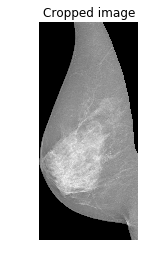

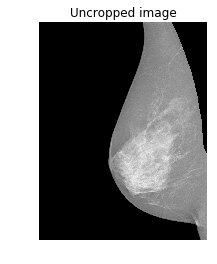

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 107, number of images for testing is 303


In [2]:
import immas
import matplotlib.pyplot as plt
from immas import MammogramImage
from immas.io import read_dataset

path_image = "../dataset/images/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"

# contructor will automatically read data, if contrary not specified
# pectoral muscle will be removed from image if we have corresponding mask available
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)

# check whether this image has ground truth segmentation result available
if mm.image_ground_truth:
    print('Ground truth available, can be used for training')
else:
    print('No ground truth result available, can be used for testing purposes')

# attribute .image_data contains actual image cropped according to the masks    
plt.imshow(mm.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

#attribute .image_data contains actual image cropped according to the masks   
plt.imshow(mm.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

data_set = read_dataset(image_folder="../dataset/images",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

In [ ]:
#Wavelet transform tiral

In [15]:
import numpy as np
import pywt
import math


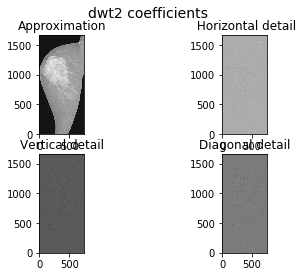

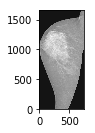

In [36]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(mm.image_data, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
    plt.show()
    ax.set_title(titles[i], fontsize=12)
    
    
    
fig.suptitle("dwt2 coefficients", fontsize=14)


In [56]:
LL = math.sqrt(2)*LL
LH = math.sqrt(2)*LH
HL = math.sqrt(2)*HL
HH = math.sqrt(2)*HH
coeffs2 = LL, (LH, HL, HH) 

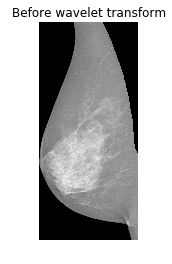

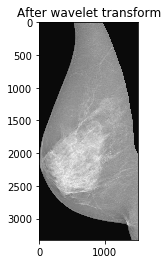

In [57]:
plt.imshow(mm.image_data, cmap="gray")
plt.axis('off')
plt.title('Before wavelet transform')
plt.show()

reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)
plt.title('After wavelet transform')
plt.show()
